In [80]:
# use python3 for this demonstration of ABC
#!/usr/bin/env/python3
# to activate python3 kernel in jupyter, must use the menu "Kernel" to select the
# python3 kernel
# once the kernel is set, the jupyter doc remembers the last kernel activated.
import numpy as np               # for improved math library
import matplotlib.pyplot as plt  # for plotting
%matplotlib inline

# CW-07 matplotlib Tutorial Exercise
*Lance Clifner, Eric Freda*
<br>CS-510
<br>October 11, 2016

## Simple Plot
In this document, we will work through the example in section 1.4.2 in the matplotlib Tutorial.  This tutorial can be found at:  http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

The first step in the exercise is to calculate a string of sine and cosine values.
The code is commented to explain what is being done in each step.

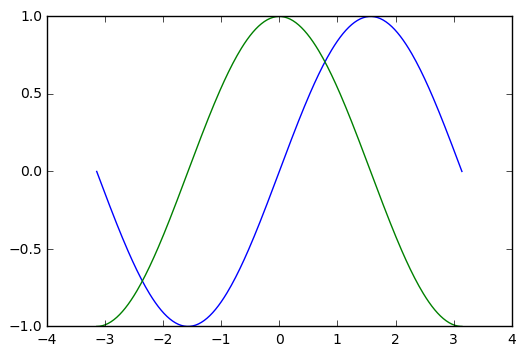

In [81]:
# get an array of evenly-spaced values (in radians) to be used with the
# sine and cosine functions.
# the N-dimensional array has a total of 256 elements,
# and the values include the end points of the range
X = np.linspace( -np.pi, np.pi, 256, endpoint=True )
# uncomment these lines for debug purposes to see the data type and values of the X array
#type( X )
#X

# get the array of sine and cosine values represented by the X array of radians
S = np.sin( X )
C = np.cos( X )

# uncomment these lines to see the type and contents of the S and C arrays
#type( S )
#type( C )
#S, C

# let's plot the sine and cosine values against the X values
plt.plot( X, S )
plt.plot( X, C )

# normally, in a python script, in order to visualize the resultant plot, 
# we must force it to be displayed.  The plt command to force the display is:
#plt.show()
# However, with this notebook, the magic line, %matplotlib inline, at the top of the
# document causes the plot to appear automatically when plot is called.

# Run this code, and note that the plot below runs from -pi to +pi, following the
# contents of the X array.

In this next segment, we will work on customizing the sine/cosine plot above.  Note that the resultant plot doesn't look pretty (meaning symmetric and well-cropped), but that is by design.

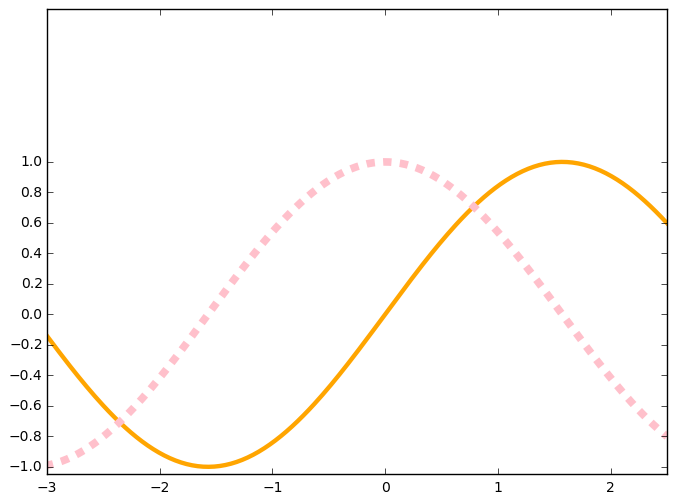

In [94]:
# Note that the global variables and values from earlier code segments persist 
# through subsequent code seqments.  Thus we can continue working without having to
# copy the code from earlier seqments.

# linestyles can be found from (uncomment these lines to report the valid linestyle choices)
# note that the linestyles don't say what they are (dashed, solid, etc), so you should
# try them out to see what they do:
#from matplotlib import lines
#lines.lineStyles.keys()

# create a new figure of size 8x6 inches, using 100 dots per inch
fig = plt.figure( figsize=(8,6), dpi=100 )
# Note that a matplot figure is a top level container that holds all sorts of matplot elements
# Note that a figure doesn't draw or display anything, is is simply a container of data.

# create a new subplot from a grid of 1x1
plt.subplot( 1, 1, 1 )
# note that this creates a plot which runs from 0 to 1 on the x- and y-axes,
# but because our figure is not square (it's 8x6), the subplot also appears rectangular
# so the two axes are not equally scaled

# now, we will plot the sine with orange and a continuous width of pi pixels
plt.plot( X, S, color="orange", linewidth=np.pi, linestyle="-" )
# curiously, this plot killed our subplot and went back to the axial dimensions of our
# first plot, but the pixel dimensions seem to hold true (that is 800 x 600 pixels)

# now plot the cosine with a pink dashed line
plt.plot( X, C, color="pink", linewidth=5.5, linestyle="--" )
# note that the most recent plot draws "on-top" of the previous plots.

# set x tic marks, don't align them with the x limits, but do make them equi-spaced
plt.xticks( np.linspace( -4, 4, 9, endpoint=True ) )
# set limits on the x-axis, make these smaller than the actual x-range and assymmetric
plt.xlim( -3, 2.5 )
# note that we have to put the x-limit after the tics, otherwise the tics force the
# xlimits to be the tic range

# Set y ticks
plt.yticks( np.linspace( -1, 1, 11, endpoint=True ) )
# Set y limits to be just past the min/max of the curves--note this is also asymmetric
plt.ylim( -1.05, 2 )
# note that the upper y limit exceeds the range of the y tics, so there are no tics past 1

# no, the result doesn't look pretty, but it is exactly what we told it to be

# save this plot as a png file, with a non-standard dpi
plt.savefig( "cw_07_plot.png", dpi=58 )
# note that the file format is specified by the extension of the given filename.
# thus, .pdf, .jpg, etc.


In this next segment, we will toy with additional customization of the plot, including axes, labels, and legends.  We are bypassing some of the tutorial points, as we covered those in the previous segment.  For the record, we are skipping:  colors & line widths, limits, and tics.

We are doing tic labels, moving spines, legend, and annotating the plot.

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


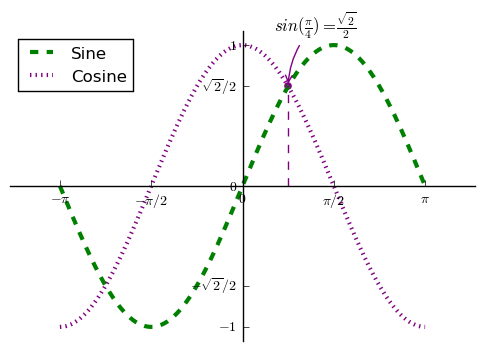

In [126]:
# In this cell, we will move the spines to the center of the plot, just like axes on a graph
# note that the spines need to be moved before the limits and tics are set

axes = plt.gca()  # note that gca stands for 'get current axes', because it gets all the axes
# there are 4 spines, one on each side of the plotted area
# we will make two of these disappear by setting the color to nothing
# we want to keep the two spines that current have labels attached to them
axes.spines[ 'top' ].set_color( 'none' )
axes.spines[ 'right' ].set_color( 'none' )
axes.xaxis.set_ticks_position( 'bottom' )  # this clears the tics from the top
axes.yaxis.set_ticks_position( 'left' )  # this clears the tics from the right
axes.spines[ 'bottom' ].set_position( ('data', 0) )  # stick it thru the origin
axes.spines[ 'left' ].set_position( ('data', 0) )    # stick it thru the origin

# let's play with the tic labels
# set the actual location of the ticks, then specify the labels for those tics
# we need to have the same number of labels as there are tic marks specified
plt.xticks( np.linspace( -np.pi, np.pi, 5, endpoint=True ), 
            [ r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
# set the limits far enough out so that the tic marks are all seen
plt.xlim( -4, 4 )

# we can also make a specific list of tic marks, rather than an equi-spaced generated list
plt.yticks( [-1, -0.707, 0, 0.707, 1], 
            [ r'$-1$', r'$-\sqrt{2}/2$', r'$0$', r'$\sqrt{2}/2$', r'$1$'])

# let's add a legend to the most open area of the plot
plt.plot( X, S, color="green", linewidth=3, linestyle='--', label="Sine")
plt.plot( X, C, color="purple", linewidth=3, linestyle=':', label="Cosine")
plt.legend( loc='upper left' )

# let's annotate a the points at the pi/4
annot = np.pi/4
plt.plot( [annot, annot], [0, np.cos( annot )], color='purple', linewidth=1, linestyle="--")
plt.scatter( [annot ], [np.cos( annot )], 20, color='purple' )
plt.annotate( r'$sin(\frac{\pi}{4}) = \frac{\sqrt{2}}{2}$',
             xy=(annot,np.sin(annot)), xycoords='data',
             xytext=(-10,+40), textcoords='offset points', fontsize=12, 
            arrowprops=dict( arrowstyle="->", color='purple', connectionstyle="arc3, rad=.2" ))


In the next three code segments, we will look at the contour, imshow, and 3D plots.

/usr/lib/python3/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


([], <a list of 0 Text yticklabel objects>)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


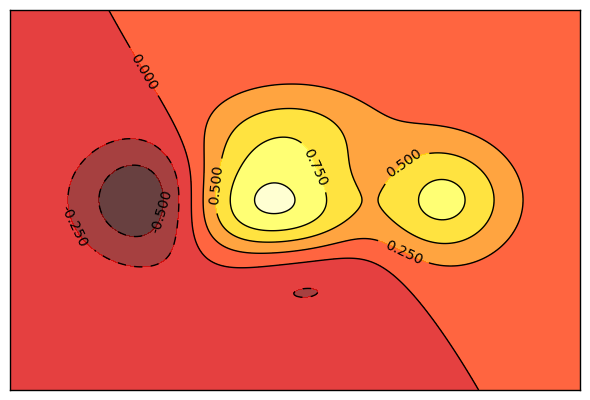

In [147]:
# this is the contour plot exercise
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

# must set axes before plotting the data
plt.axes([0.025, 0.025, 0.95, 0.95])


# change to the hot map colors
plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)

# label the contours as per the the axes
plt.clabel(C, inline=1, fontsize=10)

# eliminate the tics around the edges (spines) of the plot
plt.xticks(())
plt.yticks(())



([], <a list of 0 Text yticklabel objects>)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


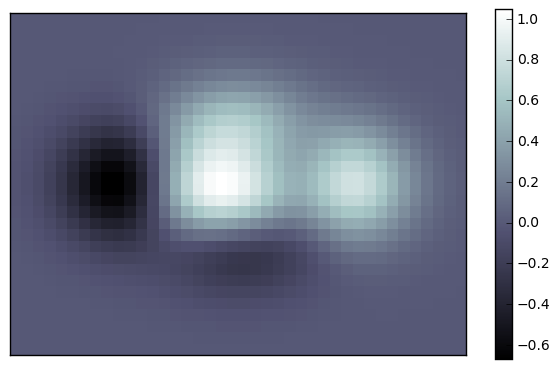

In [151]:
# this is the imshow plot exercise
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)

# set the axes before plotting
plt.axes([0.025, 0.025, 0.95, 0.95])

plt.imshow(f(X, Y), cmap='bone', interpolation='nearest', origin='lower')

# add the color bar for the color map
plt.colorbar(shrink=.92)

# remove the tics from the spines
plt.xticks(())
plt.yticks(())


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


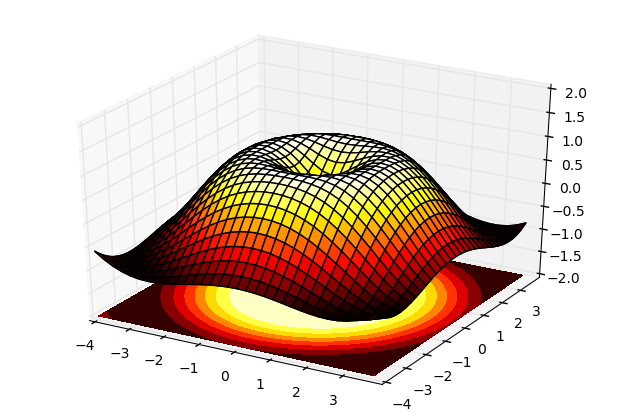

In [138]:
# this is the 3D plot exercise
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

# set the lower z-limit
ax.set_zlim(top=2,bottom=-2)
ax.set_ylim(top=3.9)
ax.set_xlim(right=3.9)

# draw the bottom contour colors
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
